# Project 5 : Great Energy Predictor

### UserName : Snow White

In [1]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# get building metadata
building_metadata = pd.read_csv("building_metadata.csv")
print(building_metadata.shape)
building_metadata.head(10)

(1449, 6)


,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
5,0,5,Education,8000,2000.0,NaN
6,0,6,Lodging/residential,27926,1981.0,NaN
7,0,7,Education,121074,1989.0,NaN
8,0,8,Education,60809,2003.0,NaN
9,0,9,Office,27000,2010.0,NaN


In [3]:
# get train data
train_data = pd.read_csv("train.csv")
print(train_data.shape)
train_data["timestamp"] = pd.to_datetime(train_data["timestamp"])
train_data.head(10)

(20216100, 4)


,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01,0.0
1,1,0,2016-01-01,0.0
2,2,0,2016-01-01,0.0
3,3,0,2016-01-01,0.0
4,4,0,2016-01-01,0.0
5,5,0,2016-01-01,0.0
6,6,0,2016-01-01,0.0
7,7,0,2016-01-01,0.0
8,8,0,2016-01-01,0.0
9,9,0,2016-01-01,0.0


In [4]:
# get weather train data
weather_train_data = pd.read_csv("weather_train.csv")
print(weather_train_data.shape)
weather_train_data["timestamp"] = pd.to_datetime(weather_train_data["timestamp"])
weather_train_data.head(10)

(139773, 9)


,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
5,0,2016-01-01 05:00:00,19.4,NaN,19.4,0.0,NaN,0.0,0.0
6,0,2016-01-01 06:00:00,21.1,6.0,21.1,-1.0,1019.4,0.0,0.0
7,0,2016-01-01 07:00:00,21.1,NaN,21.1,0.0,1018.8,210.0,1.5
8,0,2016-01-01 08:00:00,20.6,NaN,20.0,0.0,1018.1,0.0,0.0
9,0,2016-01-01 09:00:00,21.1,NaN,20.6,0.0,1019.0,290.0,1.5


In [5]:
# merge building_metadata and train data
building_train_merged = pd.merge(building_metadata, train_data, how = 'inner', on = ['building_id'], sort = True)
print(building_train_merged.shape)
building_train_merged.head(10)

(20216100, 9)


,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,timestamp,meter_reading
0,0,0,Education,7432,2008.0,NaN,0,2016-01-01 00:00:00,0.0
1,0,0,Education,7432,2008.0,NaN,0,2016-01-01 01:00:00,0.0
2,0,0,Education,7432,2008.0,NaN,0,2016-01-01 02:00:00,0.0
3,0,0,Education,7432,2008.0,NaN,0,2016-01-01 03:00:00,0.0
4,0,0,Education,7432,2008.0,NaN,0,2016-01-01 04:00:00,0.0
5,0,0,Education,7432,2008.0,NaN,0,2016-01-01 05:00:00,0.0
6,0,0,Education,7432,2008.0,NaN,0,2016-01-01 06:00:00,0.0
7,0,0,Education,7432,2008.0,NaN,0,2016-01-01 07:00:00,0.0
8,0,0,Education,7432,2008.0,NaN,0,2016-01-01 08:00:00,0.0
9,0,0,Education,7432,2008.0,NaN,0,2016-01-01 09:00:00,0.0


In [6]:
# merge weather_train with merged building_metadata and train data
data_merged = pd.merge(building_train_merged, weather_train_data, how = 'left', on = ['site_id', 'timestamp'], sort = True)
print(data_merged.shape)
data_merged.head(10)


(20216100, 16)


,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,Education,7432,2008.0,NaN,0,2016-01-01,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,1,Education,2720,2004.0,NaN,0,2016-01-01,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,0,2,Education,5376,1991.0,NaN,0,2016-01-01,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,0,3,Education,23685,2002.0,NaN,0,2016-01-01,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,0,4,Education,116607,1975.0,NaN,0,2016-01-01,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
5,0,5,Education,8000,2000.0,NaN,0,2016-01-01,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
6,0,6,Lodging/residential,27926,1981.0,NaN,0,2016-01-01,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
7,0,7,Education,121074,1989.0,NaN,0,2016-01-01,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
8,0,8,Education,60809,2003.0,NaN,0,2016-01-01,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
9,0,9,Office,27000,2010.0,NaN,0,2016-01-01,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


In [7]:
# extract hour, day, weekday, month from timestamp attribute in data_merged
data_merged['hour'] = data_merged['timestamp'].dt.hour
data_merged['day'] = data_merged['timestamp'].dt.day
data_merged['weekday'] = data_merged['timestamp'].dt.weekday
data_merged['month'] = data_merged['timestamp'].dt.month
del data_merged['timestamp']
data_merged.head(10)
        

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,day,weekday,month
0,0,0,Education,7432,2008.0,NaN,0,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
1,0,1,Education,2720,2004.0,NaN,0,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
2,0,2,Education,5376,1991.0,NaN,0,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
3,0,3,Education,23685,2002.0,NaN,0,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
4,0,4,Education,116607,1975.0,NaN,0,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
5,0,5,Education,8000,2000.0,NaN,0,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
6,0,6,Lodging/residential,27926,1981.0,NaN,0,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
7,0,7,Education,121074,1989.0,NaN,0,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
8,0,8,Education,60809,2003.0,NaN,0,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
9,0,9,Office,27000,2010.0,NaN,0,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1


In [8]:
# replace numerical values of meter with categorical values
data_merged['meter'].replace({0:"Electricity",1:"ChilledWater",2:"Steam",3:"HotWater"},inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


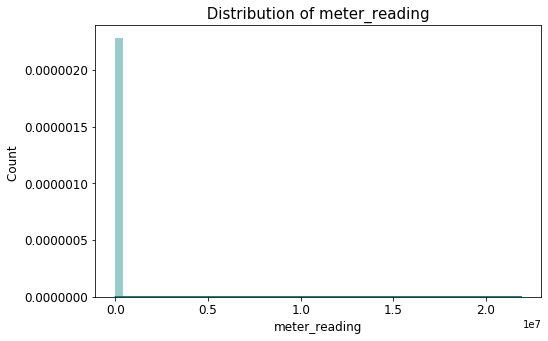

In [9]:
# plot for distribution of meter reading
plt.rcParams['figure.figsize'] = (8, 5)
ax = sns.distplot(data_merged['meter_reading'], color = 'teal')
plt.xlabel('meter_reading', fontsize = 12)
plt.ylabel('Count ', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title(' Distribution of meter_reading ', fontsize = 15)
plt.show()

In [10]:
# descriptive statistics of meter_reading
data_merged['meter_reading'].describe()

count    2.021610e+07
mean     2.117121e+03
std      1.532356e+05
min      0.000000e+00
25%      1.830000e+01
50%      7.877500e+01
75%      2.679840e+02
max      2.190470e+07
Name: meter_reading, dtype: float64

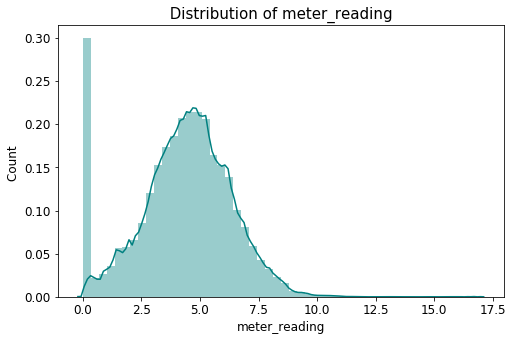

In [11]:
# log transformation of meter_reading and distribution of meter reading after transformation
data_merged['meter_reading'] = np.log1p(data_merged['meter_reading'])
plt.rcParams['figure.figsize'] = (8,5)
ax = sns.distplot(data_merged['meter_reading'], color = 'teal')
plt.xlabel('meter_reading', fontsize = 12)
plt.ylabel('Count ', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title(' Distribution of meter_reading ', fontsize = 15)
plt.show()

In [12]:
# check the maximum and minimum values of meter_reading in training set
print("Max: ",data_merged['meter_reading'].max())
print("Min: ",data_merged['meter_reading'].min())

Max:  16.902211829285342
Min:  0.0


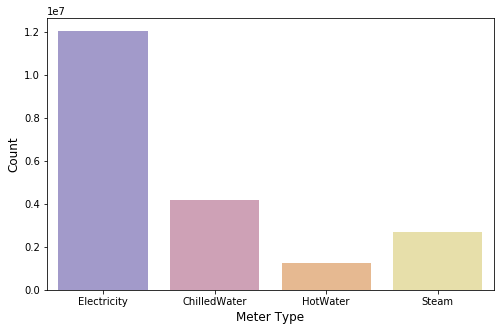

In [13]:
# Distribution of data with respect to meter type
plt.rcParams['figure.figsize'] = (8, 5)
ax = sns.countplot(data = data_merged, x ='meter', palette = 'CMRmap', alpha = 0.5)
ax.set_ylabel('Count', fontsize = 12)
ax.set_xlabel('Meter Type', fontsize = 12)
plt.show()

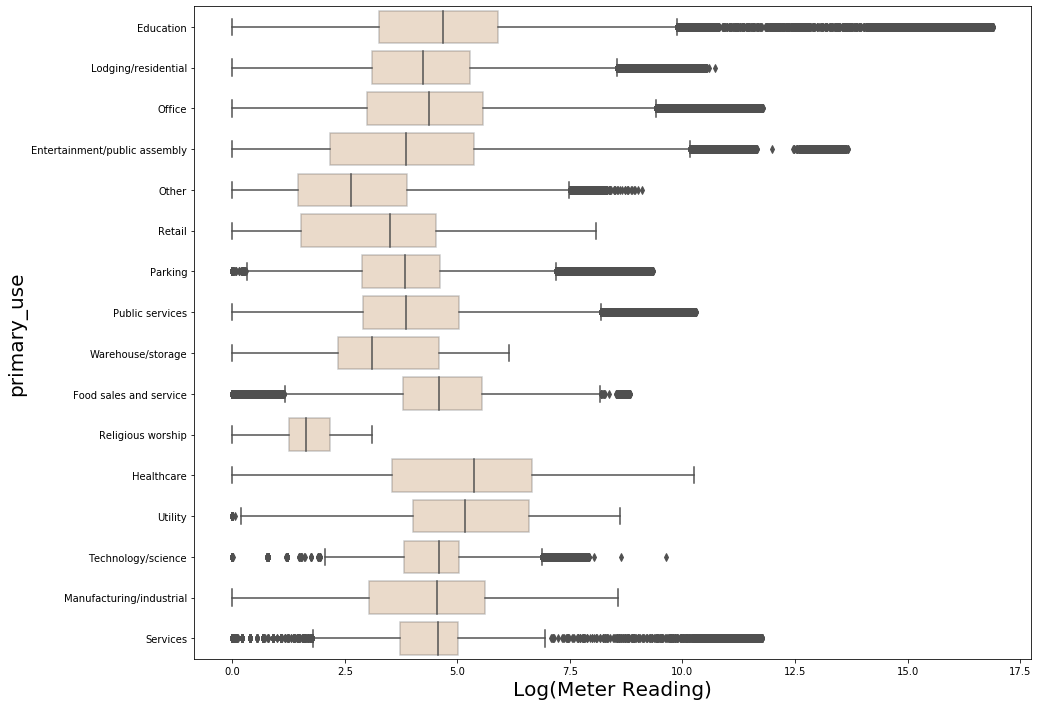

In [14]:
# Distribution of data with respect to primary_use
plt.rcParams['figure.figsize'] = (15, 12)
ax = sns.boxplot(data = data_merged, y ='primary_use', x = 'meter_reading', color = 'peru', boxprops=dict(alpha=.3))
ax.set_xlabel('Log(Meter Reading)', fontsize = 20)
ax.set_ylabel('primary_use', fontsize = 20)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


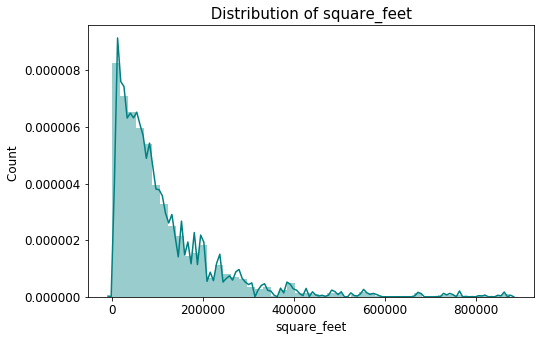

In [15]:
# plot for distribution of square feet
plt.rcParams['figure.figsize'] = (8, 5)
ax = sns.distplot(data_merged['square_feet'], color = 'teal')
plt.xlabel('square_feet', fontsize = 12)
plt.ylabel('Count ', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title(' Distribution of square_feet ', fontsize = 15)
plt.show()

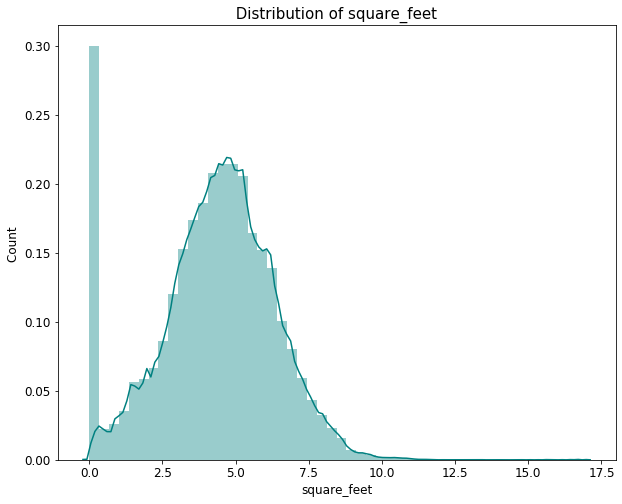

In [16]:
# log transformation of square_feet and distribution of square_feet after transformation
data_merged['square_feet'] = np.log1p(data_merged['square_feet'])
plt.rcParams['figure.figsize'] = (10, 8)
ax = sns.distplot(data_merged['meter_reading'], color = 'teal')
plt.xlabel('square_feet', fontsize = 12)
plt.ylabel('Count ', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title(' Distribution of square_feet ', fontsize = 15)
plt.show()

In [17]:
# encode the categorical values of primary_use to numeric values
data_merged['primary_use']=data_merged.primary_use.map({'Education':1,'Lodging/residential':2,'Entertainment/public assembly':3,
                                           'Public services':4,'Office':5,'Technology/science':6,'Utility':7,
                                           'Parking':8,'Other':9,'Healthcare':10,'Manufacturing/industrial':11})
data_merged.head()


,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,day,weekday,month
0,0,0,1.0,8.913685,2008.0,NaN,Electricity,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
1,0,1,1.0,7.908755,2004.0,NaN,Electricity,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
2,0,2,1.0,8.589886,1991.0,NaN,Electricity,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
3,0,3,1.0,10.072639,2002.0,NaN,Electricity,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
4,0,4,1.0,11.666573,1975.0,NaN,Electricity,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1


In [18]:
# get dummies for the catergorical attribute 'meter'
meter_dummies = pd.get_dummies(data_merged['meter'])

In [19]:
# drop the actual attribute 'meter'
data_merged = data_merged.drop(columns=['meter'], axis = 1)
data_merged.head(10)

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,day,weekday,month
0,0,0,1.0,8.913685,2008.0,NaN,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
1,0,1,1.0,7.908755,2004.0,NaN,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
2,0,2,1.0,8.589886,1991.0,NaN,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
3,0,3,1.0,10.072639,2002.0,NaN,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
4,0,4,1.0,11.666573,1975.0,NaN,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
5,0,5,1.0,8.987322,2000.0,NaN,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
6,0,6,2.0,10.237349,1981.0,NaN,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
7,0,7,1.0,11.704165,1989.0,NaN,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
8,0,8,1.0,11.015510,2003.0,NaN,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
9,0,9,5.0,10.203629,2010.0,NaN,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1


In [20]:
# concatinate the data set with dummies of 'meter'
data_merged = pd.concat([meter_dummies, data_merged], axis = 1)
data_merged.head(10)

,ChilledWater,Electricity,HotWater,Steam,site_id,building_id,primary_use,square_feet,year_built,floor_count,...,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,day,weekday,month
0,0,1,0,0,0,0,1.0,8.913685,2008.0,NaN,...,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
1,0,1,0,0,0,1,1.0,7.908755,2004.0,NaN,...,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
2,0,1,0,0,0,2,1.0,8.589886,1991.0,NaN,...,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
3,0,1,0,0,0,3,1.0,10.072639,2002.0,NaN,...,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
4,0,1,0,0,0,4,1.0,11.666573,1975.0,NaN,...,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
5,0,1,0,0,0,5,1.0,8.987322,2000.0,NaN,...,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
6,0,1,0,0,0,6,2.0,10.237349,1981.0,NaN,...,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
7,0,1,0,0,0,7,1.0,11.704165,1989.0,NaN,...,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
8,0,1,0,0,0,8,1.0,11.015510,2003.0,NaN,...,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1
9,0,1,0,0,0,9,5.0,10.203629,2010.0,NaN,...,6.0,20.0,NaN,1019.7,0.0,0.0,0,1,4,1


In [21]:
# standardize year values
data_merged['year_built'] = np.uint8(data_merged['year_built']-1900, inplace = True)

In [22]:
# encode categorical features
categorical_features = ['ChilledWater', 'Electricity', 'HotWater', 'Steam',"site_id", "building_id", 
                        "primary_use", "hour", "weekday", "wind_direction"]
ce = category_encoders.CountEncoder(cols=categorical_features)
ce.fit(data_merged)
data_merged = ce.transform(data_merged)
data_merged.head()

,ChilledWater,Electricity,HotWater,Steam,site_id,building_id,primary_use,square_feet,year_built,floor_count,...,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,day,weekday,month
0,16033660,12060910,18952063,17507387,1076662,8784,8165504,8.913685,108,NaN,...,6.0,20.0,NaN,1019.7,2373540,0.0,842381,1,2927218,1
1,16033660,12060910,18952063,17507387,1076662,8784,8165504,7.908755,104,NaN,...,6.0,20.0,NaN,1019.7,2373540,0.0,842381,1,2927218,1
2,16033660,12060910,18952063,17507387,1076662,8784,8165504,8.589886,91,NaN,...,6.0,20.0,NaN,1019.7,2373540,0.0,842381,1,2927218,1
3,16033660,12060910,18952063,17507387,1076662,8784,8165504,10.072639,102,NaN,...,6.0,20.0,NaN,1019.7,2373540,0.0,842381,1,2927218,1
4,16033660,12060910,18952063,17507387,1076662,8784,8165504,11.666573,75,NaN,...,6.0,20.0,NaN,1019.7,2373540,0.0,842381,1,2927218,1


In [23]:
# find the number of missing values in each column
data_merged.isnull().sum(axis = 0)

ChilledWater                 0
Electricity                  0
HotWater                     0
Steam                        0
site_id                      0
building_id                  0
primary_use                  0
square_feet                  0
year_built                   0
floor_count           16709167
meter_reading                0
air_temperature          96658
cloud_coverage         8825365
dew_temperature         100140
precip_depth_1_hr      3749023
sea_level_pressure     1231669
wind_direction               0
wind_speed              143676
hour                         0
day                          0
weekday                      0
month                        0
dtype: int64

In [24]:
# replace the missing values with 0
data_merged = data_merged.fillna(0)

In [25]:
# get the valid rows from the data_merged which are non zero
data_merged = data_merged[(data_merged.square_feet>0) & (data_merged.year_built>0) & (data_merged.floor_count >0)
           & (data_merged.primary_use >0)]

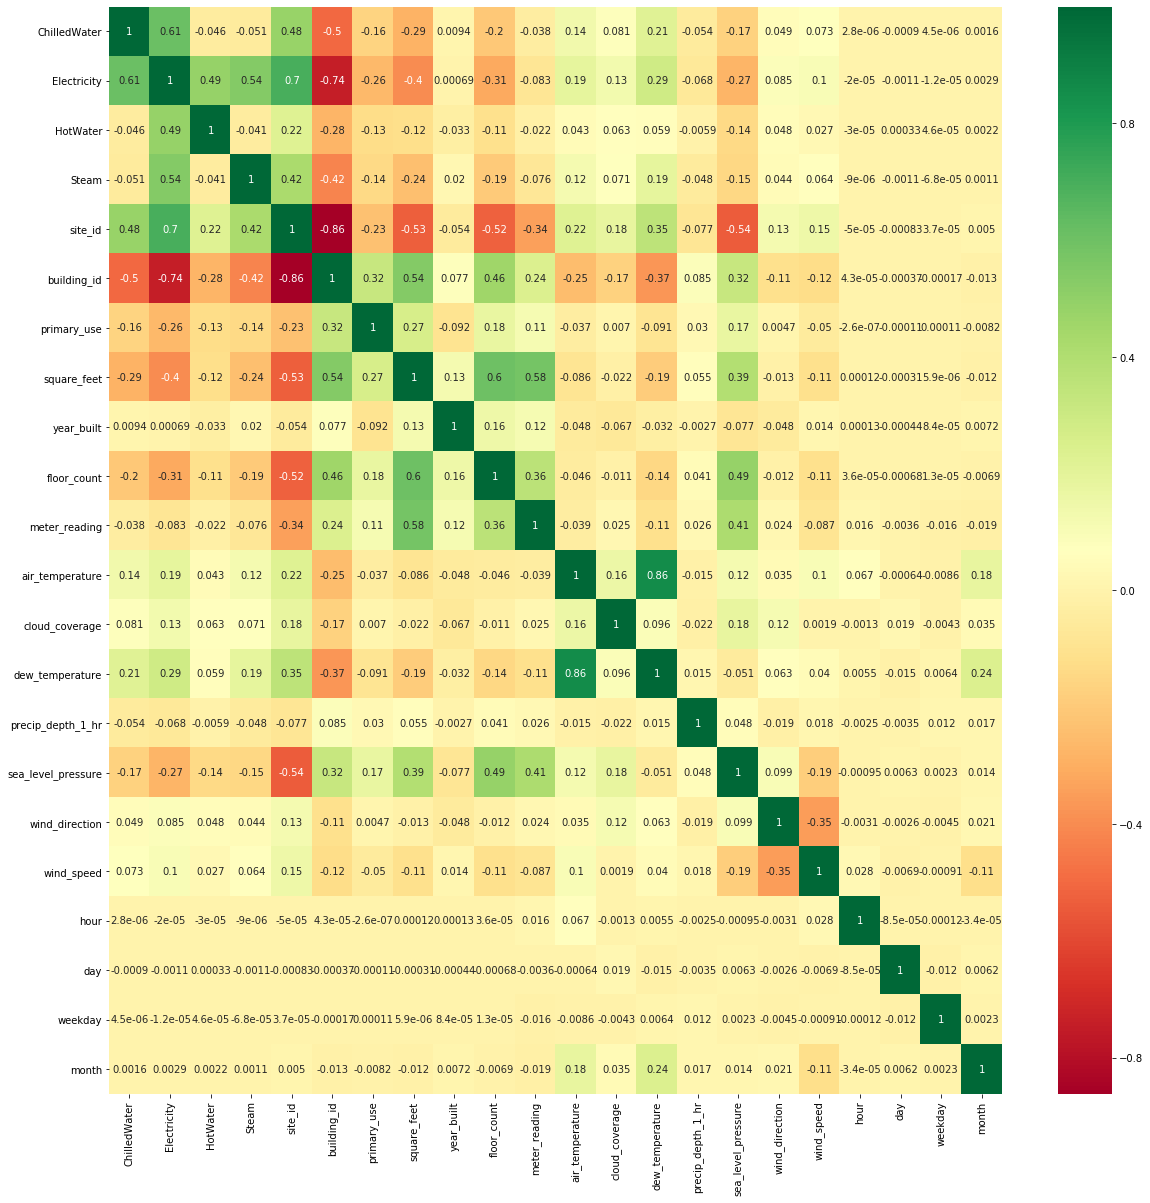

In [26]:
# get the correlation matrix of the attributes in the data_merged dataset
import seaborn as sns
corrmat = data_merged.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(data_merged[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [27]:
# Partition the data into training and validation set to evaluate various models using validation set
X_train,X_val,Y_train,Y_val = train_test_split(data_merged.iloc[:,[0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21]],
                                               data_merged.iloc[:,[10]],test_size=0.25,random_state =0)
                                                                

In [28]:
# Standardize(scale) the data 
scalerX = StandardScaler()
columnsX = X_train.columns
scalerX.fit(X_train)
X_train_scaled = scalerX.transform(X_train)
X_val_scaled = scalerX.transform(X_val)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=columnsX)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=columnsX)


In [29]:
#LINEAR REGRESSION model
LR_model = linear_model.LinearRegression().fit(X = X_train_scaled_df, y = Y_train)

LR_predicted = LR_model.predict(X_val_scaled_df)

print('Linear Regression Model')

LR_R_square = LR_model.score(X = X_val_scaled_df,y = Y_val)
print()
print('R square')
print(LR_R_square)

LR_RootMeanSquareError = np.sqrt(mean_squared_error(Y_val, LR_predicted))
print()
print('Root Mean Square Error')
print(LR_RootMeanSquareError)

Linear Regression Model

R square
0.43923074997777584

Root Mean Square Error
1.561774097294691


In [30]:
#Ridge REGRESSION model
Ridge_model = linear_model.Ridge(alpha=.5).fit(X = X_train_scaled_df, y = Y_train)

Ridge_predicted = Ridge_model.predict(X_val_scaled_df)

print('Ridge Regression Model')

Ridge_R_square = Ridge_model.score(X = X_val_scaled_df,y = Y_val)
print()
print('R square')
print(Ridge_R_square)

Ridge_RootMeanSquareError = np.sqrt(mean_squared_error(Y_val, Ridge_predicted))
print()
print('Root Mean Square Error')
print(Ridge_RootMeanSquareError)


Ridge Regression Model

R square
0.4392309491413351

Root Mean Square Error
1.5617738199537743


In [31]:
#Bayesian Ridge REGRESSION model
Y_train = Y_train.values.ravel()
Bayesian_Ridge_model = linear_model.BayesianRidge().fit(X = X_train_scaled_df, y = Y_train)

Bayesian_Ridge_predicted = Bayesian_Ridge_model.predict(X_val_scaled_df)

print('Bayesian Ridge Regression Model')

Bayesian_Ridge_R_square = Bayesian_Ridge_model.score(X = X_val_scaled_df,y = Y_val)
print()
print('R square')
print(Bayesian_Ridge_R_square)

Bayesian_Ridge_RootMeanSquareError = np.sqrt(mean_squared_error(Y_val, Bayesian_Ridge_predicted))
print()
print('Root Mean Square Error')
print(Bayesian_Ridge_RootMeanSquareError)


Bayesian Ridge Regression Model

R square
0.43923087396057203

Root Mean Square Error
1.5617739246451292


In [32]:
# Gradient Boosting REGRESSION model
GB_model = GradientBoostingRegressor(n_estimators=10, learning_rate=0.1,
          max_depth=1, random_state=0).fit(X = X_train_scaled_df, y = Y_train)

GB_predicted = GB_model.predict(X_val_scaled_df)

print('Gradient Boosting Regressor')

GB_R_square = GB_model.score(X = X_val_scaled_df,y = Y_val)
print()
print('R square')
print(GB_R_square)

GB_RootMeanSquareError = np.sqrt(mean_squared_error(Y_val, GB_predicted))
print()
print('Root Mean Square Error')
print(GB_RootMeanSquareError)

print()
print('Feature importances')
print(GB_model.feature_importances_ )


Gradient Boosting Regressor

R square
0.3026301927146213

Root Mean Square Error
1.7416371924352358

Feature importances
[0.         0.         0.         0.         0.         0.
 0.         0.69540225 0.         0.30459775 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


In [33]:
# Random Forest REGRESSION model
RF_model = RandomForestRegressor(n_estimators=10, random_state=42).fit(X = X_train_scaled_df, y = Y_train)

RF_predicted = RF_model.predict(X_val_scaled_df)

print('Random Forest Regressor')

RF_R_square = RF_model.score(X = X_val_scaled_df,y = Y_val)
print()
print('R square')
print(RF_R_square)

RF_RootMeanSquareError = np.sqrt(mean_squared_error(Y_val, RF_predicted))
print()
print('Root Mean Square Error')
print(RF_RootMeanSquareError)

print()
print('Feature importances')
print(RF_model.feature_importances_ )


Random Forest Regressor

R square
0.9655695882252688

Root Mean Square Error
0.3869877595712031

Feature importances
[9.55050710e-03 1.74860238e-02 9.59637762e-03 1.24279025e-02
 4.74667305e-02 3.11190941e-02 1.85284481e-02 4.18146707e-01
 6.84833133e-02 9.38473759e-02 7.43693295e-02 9.78923142e-05
 6.29277176e-02 3.60597681e-04 8.52371138e-03 5.09873214e-03
 5.26616847e-03 2.38243250e-02 1.91478862e-02 1.16321861e-02
 6.20989739e-02]


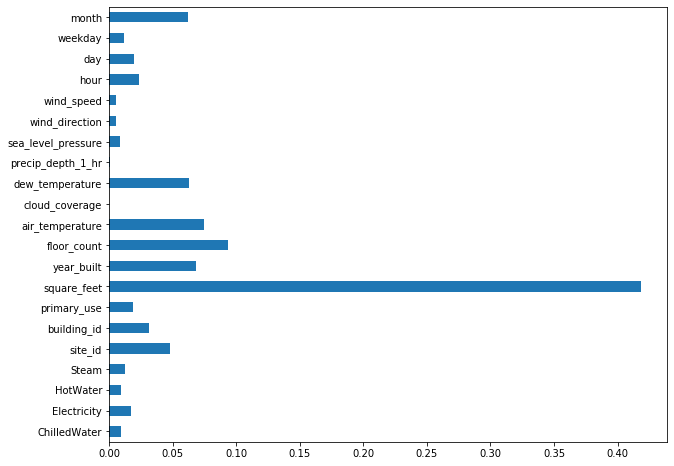

In [34]:
# plot feature importances
imp_features = pd.Series(RF_model.feature_importances_, index = X_train.columns)
imp_features.plot(kind = "barh") 

In [35]:
# create a dataframe with models and corresponding RMSE
R2_RMSE = [['Linear Regression', LR_RootMeanSquareError, LR_R_square], 
              ['Ridge Regression', Ridge_RootMeanSquareError, Ridge_R_square], 
              ['Bayesian Ridge Regreesion', Bayesian_Ridge_RootMeanSquareError, Bayesian_Ridge_R_square],
              ['Gradient Boosting Regressor', GB_RootMeanSquareError, GB_R_square], 
              ['Random Forest Regressor', RF_RootMeanSquareError, RF_R_square]] 
ModelEvaluation = pd.DataFrame(R2_RMSE, columns = ['Model', 'RMSE', 'R_Square'])

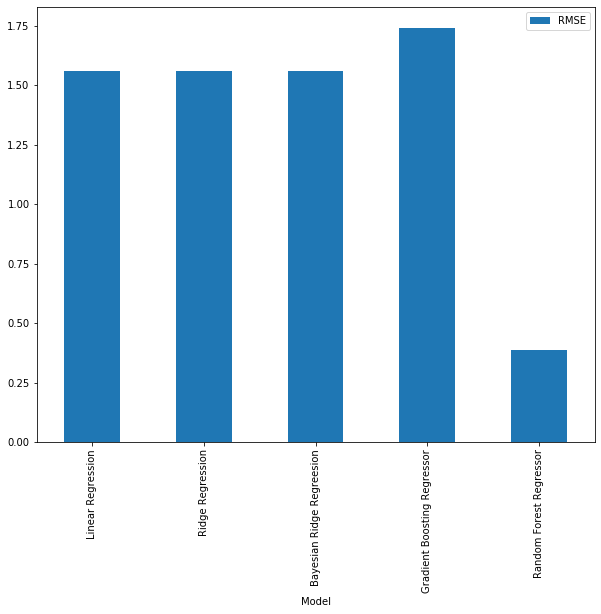

In [36]:
# plot RMSE for the evaluation of models 
plt.rcParams['figure.figsize'] = (10, 8)
ModelEvaluation.plot(kind='bar',x='Model',y='RMSE')

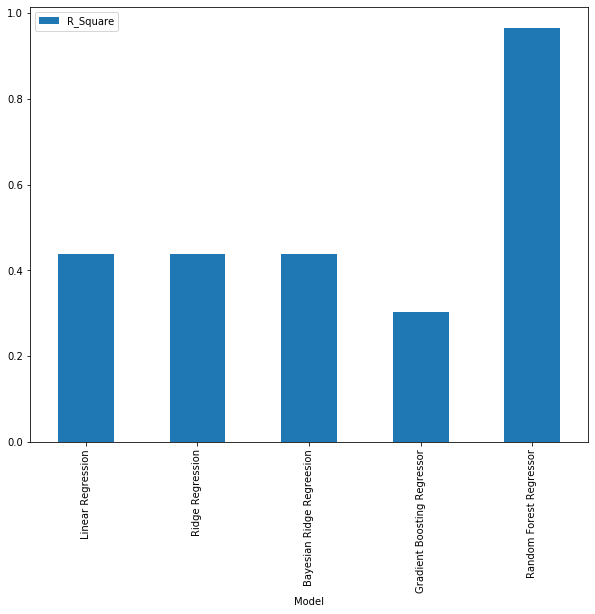

In [37]:
# plot R_Square for the evaluation of models 
plt.rcParams['figure.figsize'] = (10, 8)
ModelEvaluation.plot(kind='bar',x='Model',y='R_Square')

In [38]:
# get test data
test_data = pd.read_csv("test.csv")
print(test_data.shape)
test_data["timestamp"] = pd.to_datetime(test_data["timestamp"])
test_data.head(10)

(41697600, 4)


,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01
1,1,1,0,2017-01-01
2,2,2,0,2017-01-01
3,3,3,0,2017-01-01
4,4,4,0,2017-01-01
5,5,5,0,2017-01-01
6,6,6,0,2017-01-01
7,7,7,0,2017-01-01
8,8,7,1,2017-01-01
9,9,8,0,2017-01-01


In [39]:
# get weather test data
weather_test_data = pd.read_csv("weather_test.csv")
print(weather_test_data.shape)
weather_test_data["timestamp"] = pd.to_datetime(weather_test_data["timestamp"])
weather_test_data.head(10)

(277243, 9)


,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
1,0,2017-01-01 01:00:00,17.8,2.0,12.8,0.0,1022.0,130.0,3.1
2,0,2017-01-01 02:00:00,16.1,0.0,12.8,0.0,1021.9,140.0,3.1
3,0,2017-01-01 03:00:00,17.2,0.0,13.3,0.0,1022.2,140.0,3.1
4,0,2017-01-01 04:00:00,16.7,2.0,13.3,0.0,1022.3,130.0,2.6
5,0,2017-01-01 05:00:00,15.6,2.0,12.8,0.0,1022.1,130.0,2.1
6,0,2017-01-01 06:00:00,15.0,0.0,12.8,0.0,1021.7,150.0,1.5
7,0,2017-01-01 07:00:00,15.0,2.0,13.3,0.0,1021.6,0.0,0.0
8,0,2017-01-01 08:00:00,13.3,0.0,12.2,0.0,1021.4,0.0,0.0
9,0,2017-01-01 09:00:00,12.2,4.0,11.7,0.0,1021.4,0.0,0.0


In [40]:
# merge building_metadata and test data
building_test_merged = pd.merge(building_metadata, test_data, how = 'inner', on = ['building_id'], sort = True)
print(building_test_merged.shape)
building_test_merged.head(10)

(41697600, 9)


,site_id,building_id,primary_use,square_feet,year_built,floor_count,row_id,meter,timestamp
0,0,0,Education,7432,2008.0,NaN,0,0,2017-01-01 00:00:00
1,0,0,Education,7432,2008.0,NaN,129,0,2017-01-01 01:00:00
2,0,0,Education,7432,2008.0,NaN,258,0,2017-01-01 02:00:00
3,0,0,Education,7432,2008.0,NaN,387,0,2017-01-01 03:00:00
4,0,0,Education,7432,2008.0,NaN,516,0,2017-01-01 04:00:00
5,0,0,Education,7432,2008.0,NaN,645,0,2017-01-01 05:00:00
6,0,0,Education,7432,2008.0,NaN,774,0,2017-01-01 06:00:00
7,0,0,Education,7432,2008.0,NaN,903,0,2017-01-01 07:00:00
8,0,0,Education,7432,2008.0,NaN,1032,0,2017-01-01 08:00:00
9,0,0,Education,7432,2008.0,NaN,1161,0,2017-01-01 09:00:00


In [41]:
# merge weather_train with merged building_metadata and test data
data_merged_test = pd.merge(building_test_merged, weather_test_data, how = 'left', on = ['site_id', 'timestamp'], sort = True)
print(data_merged_test.shape)
data_merged_test.head(10)


(41697600, 16)


,site_id,building_id,primary_use,square_feet,year_built,floor_count,row_id,meter,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,Education,7432,2008.0,NaN,0,0,2017-01-01,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
1,0,1,Education,2720,2004.0,NaN,1,0,2017-01-01,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
2,0,2,Education,5376,1991.0,NaN,2,0,2017-01-01,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
3,0,3,Education,23685,2002.0,NaN,3,0,2017-01-01,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
4,0,4,Education,116607,1975.0,NaN,4,0,2017-01-01,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
5,0,5,Education,8000,2000.0,NaN,5,0,2017-01-01,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
6,0,6,Lodging/residential,27926,1981.0,NaN,6,0,2017-01-01,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
7,0,7,Education,121074,1989.0,NaN,7,0,2017-01-01,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
8,0,7,Education,121074,1989.0,NaN,8,1,2017-01-01,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
9,0,8,Education,60809,2003.0,NaN,9,0,2017-01-01,17.8,4.0,11.7,NaN,1021.4,100.0,3.6


In [42]:
# extract hour, day, weekday, month from timestamp attribute in data_merged
data_merged_test['hour'] = data_merged_test['timestamp'].dt.hour
data_merged_test['day'] = data_merged_test['timestamp'].dt.day
data_merged_test['weekday'] = data_merged_test['timestamp'].dt.weekday
data_merged_test['month'] = data_merged_test['timestamp'].dt.month
del data_merged_test['timestamp']
data_merged_test.head(10)

,site_id,building_id,primary_use,square_feet,year_built,floor_count,row_id,meter,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,day,weekday,month
0,0,0,Education,7432,2008.0,NaN,0,0,17.8,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1
1,0,1,Education,2720,2004.0,NaN,1,0,17.8,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1
2,0,2,Education,5376,1991.0,NaN,2,0,17.8,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1
3,0,3,Education,23685,2002.0,NaN,3,0,17.8,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1
4,0,4,Education,116607,1975.0,NaN,4,0,17.8,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1
5,0,5,Education,8000,2000.0,NaN,5,0,17.8,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1
6,0,6,Lodging/residential,27926,1981.0,NaN,6,0,17.8,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1
7,0,7,Education,121074,1989.0,NaN,7,0,17.8,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1
8,0,7,Education,121074,1989.0,NaN,8,1,17.8,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1
9,0,8,Education,60809,2003.0,NaN,9,0,17.8,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1


In [43]:
# replace numerical values of meter with categorical values
data_merged_test['meter'].replace({0:"Electricity",1:"ChilledWater",2:"Steam",3:"HotWater"},inplace=True)

In [44]:
# apply log transformation on square_feet
data_merged_test['square_feet'] = np.log1p(data_merged_test['square_feet'])

In [45]:
# encode the categorical values of primary_use in data_merged_test to numeric values
data_merged_test['primary_use']=data_merged_test.primary_use.map({'Education':1,'Lodging/residential':2,'Entertainment/public assembly':3,
                                           'Public services':4,'Office':5,'Technology/science':6,'Utility':7,
                                           'Parking':8,'Other':9,'Healthcare':10,'Manufacturing/industrial':11})
data_merged_test.head()


,site_id,building_id,primary_use,square_feet,year_built,floor_count,row_id,meter,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,day,weekday,month
0,0,0,1.0,8.913685,2008.0,NaN,0,Electricity,17.8,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1
1,0,1,1.0,7.908755,2004.0,NaN,1,Electricity,17.8,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1
2,0,2,1.0,8.589886,1991.0,NaN,2,Electricity,17.8,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1
3,0,3,1.0,10.072639,2002.0,NaN,3,Electricity,17.8,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1
4,0,4,1.0,11.666573,1975.0,NaN,4,Electricity,17.8,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1


In [46]:
# get the dummies of the attribute 'meter'
meter_dummies = pd.get_dummies(data_merged_test['meter'])

In [47]:
# drop the actual attribute 'meter'
data_merged_test = data_merged_test.drop(columns=['meter'], axis = 1)
data_merged_test.head(10)

,site_id,building_id,primary_use,square_feet,year_built,floor_count,row_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,day,weekday,month
0,0,0,1.0,8.913685,2008.0,NaN,0,17.8,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1
1,0,1,1.0,7.908755,2004.0,NaN,1,17.8,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1
2,0,2,1.0,8.589886,1991.0,NaN,2,17.8,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1
3,0,3,1.0,10.072639,2002.0,NaN,3,17.8,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1
4,0,4,1.0,11.666573,1975.0,NaN,4,17.8,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1
5,0,5,1.0,8.987322,2000.0,NaN,5,17.8,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1
6,0,6,2.0,10.237349,1981.0,NaN,6,17.8,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1
7,0,7,1.0,11.704165,1989.0,NaN,7,17.8,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1
8,0,7,1.0,11.704165,1989.0,NaN,8,17.8,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1
9,0,8,1.0,11.015510,2003.0,NaN,9,17.8,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1


In [48]:
# concatinate the data set with dummies of 'meter'
data_merged_test = pd.concat([meter_dummies, data_merged_test], axis = 1)
data_merged_test.head(10)

,ChilledWater,Electricity,HotWater,Steam,site_id,building_id,primary_use,square_feet,year_built,floor_count,...,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,day,weekday,month
0,0,1,0,0,0,0,1.0,8.913685,2008.0,NaN,...,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1
1,0,1,0,0,0,1,1.0,7.908755,2004.0,NaN,...,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1
2,0,1,0,0,0,2,1.0,8.589886,1991.0,NaN,...,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1
3,0,1,0,0,0,3,1.0,10.072639,2002.0,NaN,...,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1
4,0,1,0,0,0,4,1.0,11.666573,1975.0,NaN,...,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1
5,0,1,0,0,0,5,1.0,8.987322,2000.0,NaN,...,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1
6,0,1,0,0,0,6,2.0,10.237349,1981.0,NaN,...,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1
7,0,1,0,0,0,7,1.0,11.704165,1989.0,NaN,...,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1
8,1,0,0,0,0,7,1.0,11.704165,1989.0,NaN,...,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1
9,0,1,0,0,0,8,1.0,11.015510,2003.0,NaN,...,4.0,11.7,NaN,1021.4,100.0,3.6,0,1,6,1


In [49]:
data_merged_test['year_built'] = np.uint8(data_merged_test['year_built']-1900, inplace = True)

In [50]:
categorical_features = ['ChilledWater', 'Electricity', 'HotWater', 'Steam',"site_id", "building_id", 
                        "primary_use", "hour", "weekday", "wind_direction"]
ce = category_encoders.CountEncoder(cols=categorical_features)
ce.fit(data_merged_test)
data_merged_test = ce.transform(data_merged_test)
data_merged_test.head()

,ChilledWater,Electricity,HotWater,Steam,site_id,building_id,primary_use,square_feet,year_built,floor_count,...,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,day,weekday,month
0,32972640,24755760,39157200,36021120,2260080,17520,16801680,8.913685,108,NaN,...,4.0,11.7,NaN,1021.4,823300,3.6,1737400,1,5997600,1
1,32972640,24755760,39157200,36021120,2260080,17520,16801680,7.908755,104,NaN,...,4.0,11.7,NaN,1021.4,823300,3.6,1737400,1,5997600,1
2,32972640,24755760,39157200,36021120,2260080,17520,16801680,8.589886,91,NaN,...,4.0,11.7,NaN,1021.4,823300,3.6,1737400,1,5997600,1
3,32972640,24755760,39157200,36021120,2260080,17520,16801680,10.072639,102,NaN,...,4.0,11.7,NaN,1021.4,823300,3.6,1737400,1,5997600,1
4,32972640,24755760,39157200,36021120,2260080,17520,16801680,11.666573,75,NaN,...,4.0,11.7,NaN,1021.4,823300,3.6,1737400,1,5997600,1


In [51]:
# find the number of missing values in each column
data_merged_test.isnull().sum(axis = 0)

ChilledWater                 0
Electricity                  0
HotWater                     0
Steam                        0
site_id                      0
building_id                  0
primary_use                  0
square_feet                  0
year_built                   0
floor_count           34444320
row_id                       0
air_temperature         221901
cloud_coverage        19542180
dew_temperature         260799
precip_depth_1_hr      7801563
sea_level_pressure     2516826
wind_direction               0
wind_speed              302089
hour                         0
day                          0
weekday                      0
month                        0
dtype: int64

In [52]:
# replace the missing values with averages
avgs = data_merged_test.loc[:,data_merged_test.isnull().sum(axis = 0) > 0].mean()
avgs = avgs.astype(int)
data_merged_test = data_merged_test.fillna(avgs)

In [53]:
# get the shape of the data_merged_test set
data_merged_test.shape

(41697600, 22)

In [54]:
# get sample_submission to see the format of output
sample_submission = pd.read_csv("sample_submission.csv")
print(sample_submission.shape)
sample_submission.head(10)

(41697600, 2)


,row_id,meter_reading
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,0


In [55]:
# get rowids from data_merged_test and then drop them
rowids = pd.DataFrame(data_merged_test['row_id'])
data_merged_test=data_merged_test.drop(["row_id"],axis=1)

In [56]:
# standardize(scale) the test set
columnsX = data_merged_test.columns
X_test_scaled = scalerX.transform(data_merged_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=columnsX)


In [57]:
# Use the best model with least Root Mean Square Error (RandomForestRegressor) to predict the target on the test set
RF_test_predicted = RF_model.predict(X_test_scaled_df)
#test_pred = scalerY.inverse_transform(LR_test_predicted)
test_pred = RF_test_predicted

In [58]:
# Build the output in the required format with rowids and predicted values on the test set
output = pd.DataFrame({'row_id':rowids["row_id"], 'meter_reading': test_pred})

In [59]:
# check the output
output

,row_id,meter_reading
0,0,1.533930
1,1,0.557138
2,2,1.755082
3,3,2.412684
4,4,3.958811
5,5,1.473085
6,6,2.728818
7,7,3.958811
8,8,3.958811
9,9,2.135211


In [60]:
# check the maximum and minimum values for predicted meter reading
print("Max: ",output['meter_reading'].max())
print("Min: ",output['meter_reading'].min())

Max:  9.414237718580951
Min:  0.0


In [61]:
# copy the output to Project5_submission_results.csv
output.to_csv('Project5_submission_results.csv', index=False)

In [62]:
# check Project5_submission_results.csv 
Project5_submission_results = pd.read_csv("Project5_submission_results.csv")
print(Project5_submission_results.shape)
Project5_submission_results.head(10)

(41697600, 2)


,row_id,meter_reading
0,0,1.533930
1,1,0.557138
2,2,1.755082
3,3,2.412684
4,4,3.958811
5,5,1.473085
6,6,2.728818
7,7,3.958811
8,8,3.958811
9,9,2.135211
